<a href="https://colab.research.google.com/github/ShDas719/chaos_game_representation/blob/main/Chaos_Game__Representation_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python implementation of Chaos Game Representation (CGR) for DNA sequences**

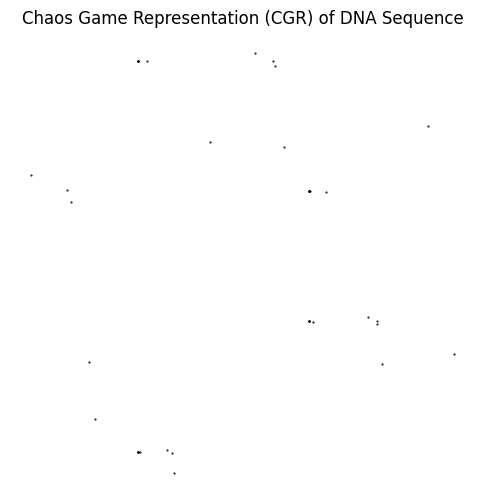

In [ ]:
import matplotlib.pyplot as plt

# Define the mapping of nucleotides to corners of a square
corner_mapping = {
    'A': (0, 0),
    'C': (0, 1),
    'G': (1, 1),
    'T': (1, 0)
}

def chaos_game_representation(sequence):
    x, y = 0.5, 0.5  # Start at the center of the square
    x_points = []
    y_points = []

    for nucleotide in sequence.upper():
        if nucleotide in corner_mapping:
            cx, cy = corner_mapping[nucleotide]
            x = (x + cx) / 2
            y = (y + cy) / 2
            x_points.append(x)
            y_points.append(y)

    return x_points, y_points

# Example DNA sequence
dna_sequence = "ACGTACGTGTCAGTACGTAGCTAGCTAGCTAGCTAGCTAGCTAG"

# Generate CGR points
x_vals, y_vals = chaos_game_representation(dna_sequence)

# Plot the CGR
plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals, 'k.', markersize=1)
plt.title("Chaos Game Representation (CGR) of DNA Sequence")
plt.axis('off')
plt.show()


# **CGR for Protein Sequences**

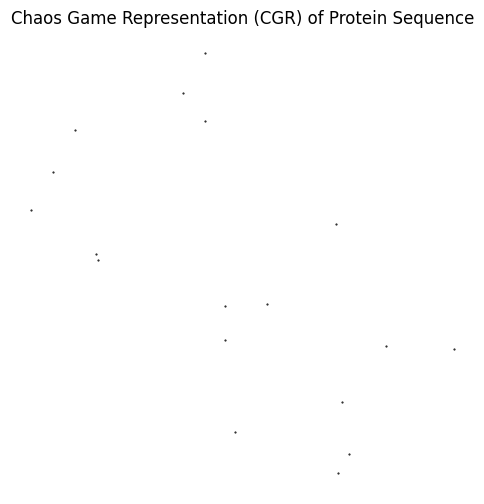

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 20 standard amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Create a mapping: Each amino acid is a point on a circle
angle_step = 2 * np.pi / 20
mapping = {
    aa: (np.cos(i * angle_step), np.sin(i * angle_step))
    for i, aa in enumerate(amino_acids)
}

def cgr_protein(sequence):
    x, y = 0.0, 0.0
    x_points, y_points = [], []

    for aa in sequence.upper():
        if aa in mapping:
            cx, cy = mapping[aa]
            x = (x + cx) / 2
            y = (y + cy) / 2
            x_points.append(x)
            y_points.append(y)

    return x_points, y_points

# Example protein sequence
protein_sequence = "MKWVTFISLLFLFSSAYS"

x_vals, y_vals = cgr_protein(protein_sequence)

plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals, 'k.', markersize=1)
plt.title("Chaos Game Representation (CGR) of Protein Sequence")
plt.axis('off')
plt.show()



# **Step-by-step CGR Image Generation and Saving for CNN Training**

In [ ]:
!pip install biopython matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.7 MB/s eta 0:00:00


# **Code to Generate and Save CGR Images**

In [ ]:
from Bio import SeqIO
import matplotlib.pyplot as plt
from PIL import Image
import os

# CGR for DNA
corner_mapping = {
    'A': (0, 0),
    'C': (0, 1),
    'G': (1, 1),
    'T': (1, 0)
}

def generate_cgr_image(sequence, img_path, resolution=128):
    x, y = 0.5, 0.5
    img = Image.new('L', (resolution, resolution), color=255)  # Grayscale image (white background)
    pixels = img.load()

    for nucleotide in sequence.upper():
        if nucleotide in corner_mapping:
            cx, cy = corner_mapping[nucleotide]
            x = (x + cx) / 2
            y = (y + cy) / 2
            px = int(x * (resolution - 1))
            py = int((1 - y) * (resolution - 1))  # Flip y for image coordinates
            pixels[px, py] = 0  # Black pixel

    img.save(img_path)

# Example usage with a list of sequences and labels
sequences = [
    ("ACGTACGTGTCAGTACGTAGCTAGCTAG", "class1"),
    ("TTGGCCGGAACCTTGGCCAAT", "class2"),
    ("ATATATCGCGCGATATATCG", "class1"),
]

output_dir = "cgr_dataset"
os.makedirs(output_dir, exist_ok=True)

# Save images
for i, (seq, label) in enumerate(sequences):
    class_dir = os.path.join(output_dir, label)
    os.makedirs(class_dir, exist_ok=True)
    img_path = os.path.join(class_dir, f"seq_{i}.png")
    generate_cgr_image(seq, img_path)


# **CNN Classification with CGR Images (Using TensorFlow)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Image settings
IMG_SIZE = 128
BATCH_SIZE = 16

# Load images from directory
# Instead of validation split, use all data for training and
# evaluate on the same train_generator for demonstration purposes
train_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    'cgr_dataset',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    # Removed subset to use all data
)

# Simple CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10)

# Evaluate the model on the training data itself
loss, accuracy = model.evaluate(train_generator)  # Use train_generator for evaluation
print(f"Training Accuracy: {accuracy:.2f}") # Changed to Training Accuracy

Found 3 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6667 - loss: 0.7586
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.6667 - loss: 2.0864
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.6667 - loss: 0.9931
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - accuracy: 0.6667 - loss: 0.2504
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step - accuracy: 0.3333 - loss: 0.8750
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step - accuracy: 0.6667 - loss: 2.5629
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 1.0000 - loss: 0.3874
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 1.0000 - loss: 0.1937
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step - accuracy: 0.6667 - loss: 0.3302
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.6667 - loss: 0.5994
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.6667 - loss: 0.8401
Training Accuracy: 0.67


# **PyTorch Dataset & DataLoader**

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Parameters
IMG_SIZE = 128
BATCH_SIZE = 16

# Transforms
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor()
])

# Load dataset
dataset = datasets.ImageFolder(root='cgr_dataset', transform=transform)

# Split into train and val
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

class_names = dataset.classes
print("Classes:", class_names)


Classes: ['class1', 'class2']


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CGRCNN(nn.Module):
    def __init__(self, num_classes):
        super(CGRCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * (IMG_SIZE // 4) * (IMG_SIZE // 4), 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))  # -> [batch, 32, 64, 64]
        x = self.pool2(F.relu(self.conv2(x)))  # -> [batch, 64, 32, 32]
        x = x.view(x.size(0), -1)              # flatten
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        return self.fc2(x)


In [ ]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CGRCNN(num_classes=len(class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}")


Epoch 1/10, Loss: 0.7094
Epoch 2/10, Loss: 2.7754
Epoch 3/10, Loss: 0.5880
Epoch 4/10, Loss: 0.4398
Epoch 5/10, Loss: 0.9465
Epoch 6/10, Loss: 0.6166
Epoch 7/10, Loss: 0.3989
Epoch 8/10, Loss: 1.1811
Epoch 9/10, Loss: 0.5984
Epoch 10/10, Loss: 0.6401


In [ ]:
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total:.2f}%")


Validation Accuracy: 100.00%


🚀 Practical Workflow Example Using UCSC Tools and CGR
Here's how these tools might fit together in a workflow:

Fetch Genome Sequences

Use ucsc-genomes-download or Table Browser.

Clean and Format Sequences

DNA Duster.

Align and Map Sequences to Genome

BLAT.

Visualize and Explore Context

Genome Browser, Genome Graphs.

Coordinate Conversion (if needed)

LiftOver or CrossMap.

Perform Comparative Analysis (e.g., CGR Visualization)

Use Python with twobitreader or Biopython, then apply CGR Python code.

Create Publication-Quality Graphics

Phylogenetic Tree PNG Maker, Genome Graphs.